# Translation Deepl API

## imports

In [2]:
import sys
# adjust path
sys.path.append('../../../../NER-german-telegram')
import pandas as pd
import deepl

## Authentication

In [3]:
from src.config import deepl_credentials

In [4]:
auth_key = deepl_credentials.auth_key

## load selected data

In [5]:
df = pd.read_csv('../temp/data_selection_final_2022_06_09-2.csv')

In [6]:
df.head()

Unnamed: 0                                             id  message_id  \
0         244   Demotermine125028861051722021-01-15 00:45:39        5172   
1       16913  Demotermine1250288610255822021-11-07 07:07:40       25582   
2       21961   Demotermine125028861016212020-06-22 14:37:40        1621   
3       18082  Demotermine1250288610235322021-10-27 05:20:30       23532   
4        5734  Demotermine1250288610212662021-10-13 20:51:46       21266   

                  date                                       cleaned_text  \
0  2021-01-15 00:29:09  Nürnberg Richard-Wagner-Platz ( Sterntor ) Vid...   
1  2021-11-07 07:07:33  WELL DONE VICTORIA !   YOU ARE NOT ALONE ... W...   
2  2020-06-22 14:37:22  Hallöchen , liebe Grüße aus Bad Tabarz wir tre...   
3  2021-10-27 05:19:32  SAFE - THE - DATES : - # mahnwache , Darmstadt...   
4  2021-10-13 20:53:00  Wegweisung für den mornigen Tag , 14. Oktober ...   

  lang  text_length  
0   de          150  
1   de          144  
2   de          226  
3   de          315  
4   de          224

In [7]:
df.text_length.sum()

362709

In [8]:
df.text_length.sum() / 500000 

0.725418

In [9]:
df.text_length.describe()

count    1843.000000
mean      196.803581
std        81.278609
min       100.000000
25%       130.000000
50%       170.000000
75%       247.000000
max       400.000000
Name: text_length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

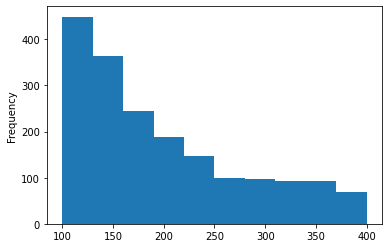

In [10]:
df.text_length.plot.hist()

# Translation DE -> EN with Deepl API

### initialize Translator

In [11]:
translator = deepl.Translator(auth_key)

In [12]:
translator

## Example request

In [16]:
text = df.cleaned_text.iloc[0]

In [17]:
text

'Nürnberg Richard-Wagner-Platz ( Sterntor ) Video 24012021 Bilder und Videos hochladen - Termine in Textform Fahren oder Mitfahren - Übernachten ? - -'

In [18]:
result = translator.translate_text(text, target_lang="EN-US")
print(result.text)  # "Bonjour, le monde !"

Nuremberg Richard-Wagner-Platz ( Sterntor ) Video 24012021 Upload pictures and videos - Dates in text form Drive or ride along - Stay overnight ? - -


In [19]:
text_en = result.text

In [20]:
text_en

'Nuremberg Richard-Wagner-Platz ( Sterntor ) Video 24012021 Upload pictures and videos - Dates in text form Drive or ride along - Stay overnight ? - -'

In [21]:
result = translator.translate_text(text_en, target_lang="DE")
print(result.text)  # "Bonjour, le monde !"

Nürnberg Richard-Wagner-Platz ( Sterntor ) Video 24012021 Bilder und Videos hochladen - Termine in Textform Mitfahren oder mitfahren - Übernachten ? - -


## get account usage info

In [22]:
usage = translator.get_usage()
if usage.any_limit_reached:
    print('Translation limit reached.')
if usage.character.valid:
    print(
        f"Character usage: {usage.character.count} of {usage.character.limit}")
if usage.document.valid:
    print(f"Document usage: {usage.document.count} of {usage.document.limit}")

Character usage: 50616 of 500000


# select some sample texts

In [23]:
df.head()

Unnamed: 0                                             id  message_id  \
0         244   Demotermine125028861051722021-01-15 00:45:39        5172   
1       16913  Demotermine1250288610255822021-11-07 07:07:40       25582   
2       21961   Demotermine125028861016212020-06-22 14:37:40        1621   
3       18082  Demotermine1250288610235322021-10-27 05:20:30       23532   
4        5734  Demotermine1250288610212662021-10-13 20:51:46       21266   

                  date                                       cleaned_text  \
0  2021-01-15 00:29:09  Nürnberg Richard-Wagner-Platz ( Sterntor ) Vid...   
1  2021-11-07 07:07:33  WELL DONE VICTORIA !   YOU ARE NOT ALONE ... W...   
2  2020-06-22 14:37:22  Hallöchen , liebe Grüße aus Bad Tabarz wir tre...   
3  2021-10-27 05:19:32  SAFE - THE - DATES : - # mahnwache , Darmstadt...   
4  2021-10-13 20:53:00  Wegweisung für den mornigen Tag , 14. Oktober ...   

  lang  text_length  
0   de          150  
1   de          144  
2   de          226  
3   de          315  
4   de          224

In [27]:
sample = df.sample(10, random_state=42)

In [28]:
sample.text_length.sum()

1966

In [29]:
len(sample)

10

In [30]:
df = sample.copy()

## function to translate texts using Deepl API

In [31]:
def translate(text, translator, target_lang, formality="less"): 
    result = translator.translate_text(text, target_lang=target_lang)
    return result.text

In [32]:
translator = deepl.Translator(auth_key)

In [33]:
df['text_EN'] = df.cleaned_text.apply(lambda x: translate(x, translator, 'EN-US'))

In [34]:
usage = translator.get_usage()
if usage.any_limit_reached:
    print('Translation limit reached.')
if usage.character.valid:
    print(
        f"Character usage: {usage.character.count} of {usage.character.limit}")
if usage.document.valid:
    print(f"Document usage: {usage.document.count} of {usage.document.limit}")

Character usage: 52565 of 500000


In [35]:
df.head()

Unnamed: 0                                             id  message_id  \
1559       12152  Demotermine1250288610116632021-06-17 16:07:39       11663   
1501         656   Demotermine125028861014532020-06-12 17:17:36        1453   
352        15563   Demotermine125028861072652021-03-07 21:26:52        7265   
1647        5938  Demotermine1250288610209862021-10-11 05:59:15       20986   
1463       10879                     Demotermine125028861013401       13401   

                     date                                       cleaned_text  \
1559  2021-06-16 22:29:14  Freiburg Aufzug mit Endkundgebung am Platz der...   
1501  2020-06-12 17:17:35  GEHT DEMONSTRIEREN ! - Message von Elijah Tee ...   
352   2021-03-07 21:26:09  15831 Blankenfelde Mahlow Berliner Speckgürtel...   
1647  2021-10-11 06:00:13  2021 10 11 Sven Liebich fragt Ministerpräsiden...   
1463  2021-08-01 12:13:19    FÜR ALLE DEMOKRATEN   GEFAHR : Die Polizei ...   

     lang  text_length                                            text_EN  
1559   de          113  Freiburg procession with final rally at the sq...  
1501   de          243  GO DEMONSTRATE ! - Message from Elijah Tee to ...  
352    de          110  15831 Blankenfelde Mahlow Berlin Speckgürtel L...  
1647   de          165  2021 10 11 Sven Liebich asks Prime Minister Ha...  
1463   de          332    FOR ALL DEMOCRATS DANGER : The police blocks...

In [36]:
df['text_DE'] = df.text_EN.apply(lambda x: translate(x, translator, 'DE'))

In [37]:
usage = translator.get_usage()
if usage.any_limit_reached:
    print('Translation limit reached.')
if usage.character.valid:
    print(
        f"Character usage: {usage.character.count} of {usage.character.limit}")
if usage.document.valid:
    print(f"Document usage: {usage.document.count} of {usage.document.limit}")

Character usage: 50824 of 500000


In [38]:
df.head()

Unnamed: 0                                             id  message_id  \
1559       12152  Demotermine1250288610116632021-06-17 16:07:39       11663   
1501         656   Demotermine125028861014532020-06-12 17:17:36        1453   
352        15563   Demotermine125028861072652021-03-07 21:26:52        7265   
1647        5938  Demotermine1250288610209862021-10-11 05:59:15       20986   
1463       10879                     Demotermine125028861013401       13401   

                     date                                       cleaned_text  \
1559  2021-06-16 22:29:14  Freiburg Aufzug mit Endkundgebung am Platz der...   
1501  2020-06-12 17:17:35  GEHT DEMONSTRIEREN ! - Message von Elijah Tee ...   
352   2021-03-07 21:26:09  15831 Blankenfelde Mahlow Berliner Speckgürtel...   
1647  2021-10-11 06:00:13  2021 10 11 Sven Liebich fragt Ministerpräsiden...   
1463  2021-08-01 12:13:19    FÜR ALLE DEMOKRATEN   GEFAHR : Die Polizei ...   

     lang  text_length                                            text_EN  \
1559   de          113  Freiburg procession with final rally at the sq...   
1501   de          243  GO DEMONSTRATE ! - Message from Elijah Tee to ...   
352    de          110  15831 Blankenfelde Mahlow Berlin Speckgürtel L...   
1647   de          165  2021 10 11 Sven Liebich asks Prime Minister Ha...   
1463   de          332    FOR ALL DEMOCRATS DANGER : The police blocks...   

                                                text_DE  
1559  Freiburger Prozession mit Abschlusskundgebung ...  
1501  GEHT DEMONSTRIEREN ! - Botschaft von Elijah Te...  
352   15831 Blankenfelde Mahlow Berlin Speckgürtel L...  
1647  2021 10 11 Sven Liebich asks Prime Minister Ha...  
1463    FÜR ALLE DEMOKRATEN GEFAHR : Die Polizei blo...

In [39]:
df.to_csv('../temp/translations_2022_06_09-2.csv')